In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import xarray as xr

import neuro_op as nop

In [2]:
nop.plot_setup()
cmap = plt.get_cmap("viridis")

In [3]:
def get_name(N_nodes, t_max):
    return str(
        "../testing/@MA-t_exec/output/"
        + "out"
        + "-N"
        + str(int(N_nodes))
        + "-t"
        + str(int(t_max))
        + ".h5"
    )


def get_dict(a, b):
    data = nop.import_hdf5(get_name(a, b), dict_stuffs=True)
    return data


def get_mu(a, b):
    data = nop.import_hdf5(get_name(a, b), samples=True)
    return data["mu_nodes"]


def get_kld(a, b):
    data = nop.import_hdf5(get_name(a, b), samples=True)
    return data["kl_divs"]

In [4]:
# Parameter ranges used for simulations
N_arr = np.logspace(1, 3, 5).astype(int)
t_arr = np.logspace(1, 3, 5).astype(int)

# xarray preparation
tmp_arr = np.zeros((len(N_arr), len(t_arr)))

In [5]:
# Initialize xarray Dataset
ds = xr.Dataset(
    {
        "t_exec": (("N", "t_max"), tmp_arr),
    },
    coords={
        "N": N_arr,
        "t_max": t_arr,
    },
)

# Populate the Dataset
for i, N in enumerate(N_arr):
    for j, t in enumerate(t_arr):
        ds["t_exec"].loc[{"N": N, "t_max": t}] = get_dict(N, t)["t_exec"]

# df = ds.to_dataframe()
ds

<xarray.Dataset> Size: 280B
Dimensions:  (N: 5, t_max: 5)
Coordinates:
  * N        (N) int64 40B 10 31 100 316 1000
  * t_max    (t_max) int64 40B 10 31 100 316 1000
Data variables:
    t_exec   (N, t_max) float64 200B 0.02371 0.06745 0.2047 ... 267.0 917.3

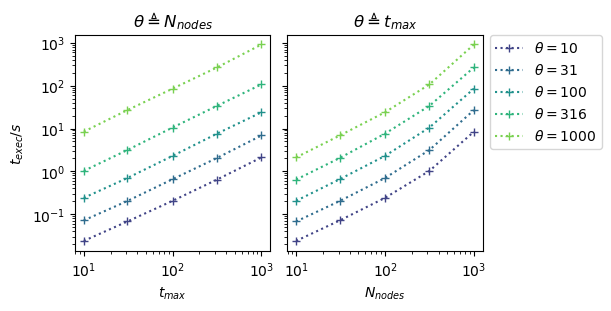

In [6]:
# Having imported the data, we can now plot the execution time as a function of the number of nodes and the maximum time
x = 2
y = 1
c = 3
fig, ax = plt.subplots(y, x, figsize=(x * c, y * c), sharey=True)
ax[0].set_prop_cycle(color=nop.get_colorcycle(len(N_arr)))
ax[1].set_prop_cycle(color=nop.get_colorcycle(len(t_arr)))
for i, N in enumerate(N_arr):
    ax[0].plot(
        t_arr,
        ds["t_exec"].loc[{"N": N}],
        ls=":",
        marker="+",
    )
for i, t in enumerate(t_arr):
    ax[1].plot(
        N_arr,
        ds["t_exec"].loc[{"t_max": t}],
        ls=":",
        marker="+",
        label="$\\theta=$" + str(t),
    )
for i in range(2):
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
ax[0].set_ylabel("$t_{exec} / s$")
ax[0].set_xlabel("$t_{max}$")
ax[1].set_xlabel("$N_{nodes}$")
ax[0].set_title("$\\theta\\triangleq N_{nodes}$")
ax[1].set_title("$\\theta\\triangleq t_{max}$")
ax[1].legend(bbox_to_anchor=(1.0, 1.03), loc="upper left")

In [7]:
fig.savefig("fig/t_exec.pdf")  # , bbox_inches="tight")